In [482]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# 와인 감별사 : 와인의 Quality를 분류하는 Classifier 만들기

## 1. 과제 설명
이번 과제에서는 케라스(Keras)를 활용하여, 와인의 품질을 분류하는 인공신경망 분류기를 만들어 볼 것입니다.
케라스는 Tensorflow, Theano 등의 딥 러닝 라이브러리 위에서 동작하는 오픈 소스 라이브러리로, 보다 쉬운 API를 제공함으로써 모델 설계 및 학습, 테스트가 간단하다는 장점이 있습니다. 

### 1.1 케라스 설치를 위한 필수 라이브러리
케라스를 설치하기 전에 먼저 필수적으로 설치해야 할 것들이 있습니다.
* Anaconda : Python 3.x 버전, Numpy, Pandas, SciPy, sklearn 등 필수 라이브러리들이 포함된 통합 배포 팩
<br> 아나콘다 설치 : https://www.anaconda.com/distribution/#download-section
* Tensorflow : Google에서 개발한 오픈 소스 딥 러닝 라이브러리. <b>설치된 Python 버전과 호환되는 것으로 설치할것!</b>
<br> 텐서플로우 설치 : https://www.tensorflow.org/install/pip
<br> * CPU 버전을 설치할 것을 권장. 

### 1.2 케라스 설치
위 라이브러리들을 설치한 후, 케라스를 설치합니다.
* https://keras.io/#installation

### 1.3 케라스 설치 확인
케라스가 올바르게 설치되었는지 확인하기 위해, 케라스를 Import한 뒤 버전을 출력해봅니다.


In [483]:
import keras

keras.__version__

'2.3.1'

위와 같이 케라스의 버전이 출력되면 정상입니다. (출력되는 버전은 위 예시와 다를 수도 있음)<br> 나중에 신경망을 만들기 위한 클래스들도 함께 Import 합시다.

In [0]:
from keras import Sequential
from keras.layers import Dense, Activation

---
## 2. Data Set 설명
 본 과제에서 사용할 데이터 셋은 UCI에서 제공되는 Wine Quality Data Set입니다. (https://archive.ics.uci.edu/ml/datasets/Wine+Quality) 데이터는 레드 와인 1599개, 화이트 와인 4898개의 화학적 특성을 포함하고 있습니다. 데이터는 두 개의 CSV(Comma-seperated values)형태로 제공되며, 구성은 다음과 같습니다.
* 화이트 와인 / 레드 와인 CSV 파일
* 11개의 실수(Real) 입력 변수 (X)
    * fixed acidity
    * volatile acidity
    * citric acid
    * residual sugar
    * chlorides
    * free sulfur dioxide
    * total sulfur dioxide
    * density
    * pH
    * sulphates
    * alcohol
* 1개의 클래스 레이블 (Y)
   * quality (0~10, 0: Very poor, 10: Very excellent)
* Missing Value 없음
* 클래스들이 불균등하게 분포함.

더 자세한 사항은 블랙보드에 함께 올라가있는 설명 파일을 참고하도록 합시다.

### 2.1 데이터 로드
데이터 분석에서 가장 많이 사용되는 라이브러리 중 하나인 Pandas와 Numpy를 Import하겠습니다. Pandas는 데이터 분석에 유용한 데이터 타입인 DataFrame을 제공하며, Numpy는 효율적이고 빠른 매트릭스 연산을 지원합니다.

In [0]:
import pandas as pd
pd.__version__
pd.options.display.max_rows=15

In [486]:
import numpy as np
np.__version__

'1.18.4'

Pandas를 이용해서 CSV 파일을 읽어들이도록 합시다. white_wine 변수에는 화이트 와인 데이터를, red_wine 변수에는 레드 와인 데이터를 읽어들입니다.

In [0]:
#########################코드########################


white_wine = pd.read_csv('/gdrive/My Drive/winequality-white.csv', header = 'infer')
red_wine = pd.read_csv('/gdrive/My Drive/winequality-red.csv', header = 'infer')


#####################################################

### 2.2 데이터 전처리
데이터를 읽어들인 뒤, 읽어들인 데이터프레임을 display 함수를 통해 확인합니다.

In [488]:
display(white_wine)




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [489]:
display(red_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


이제 데이터프레임을 입력 변수와 정답 셋(클래스 레이블)으로 나누는 함수를 작성하겠습니다.<br>
<b>generate_data</b>함수는 데이터프레임 객체와 테스트 셋 비율을 입력으로 받아, 네 개의 numpy array를 반환합니다. 트레이닝 셋과 테스트 셋의 비율은 training_set_ratio에 의해 결정됩니다.
* Function : generate_data
 * 입력
     * pd.DataFrame : df
     * double : training_set_ratio  
 * 출력
     * np.array : X_train
     * np.array : Y_train
     * np.array : X_test
     * np.array : Y_test
     


In [0]:
#####################################################
from sklearn.model_selection import train_test_split
def generate_data(df, t_r):
    X = df.drop(['quality'],axis = 1)
    Y = df['quality']
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size = t_r)

    return X_train.values, Y_train, X_test.values, Y_test
#####################################################

In [0]:
x_train, y_train, x_test, y_test = generate_data(white_wine, 0.7)


작성한 함수를 호출하여 화이트 와인 데이터에 대해 트레이닝 셋과 테스트 셋의 입력과 정답이 적절하게 생성되었는지 확인합니다.

---

# 3. 케라스를 이용한 모델 생성, 학습, 테스트
입력 데이터와 정답 셋이 만들어졌으니 케라스를 사용하여 각 데이터에 대한 분류기를 생성하고, 트레이닝 셋으로 학습시킨 뒤 테스트 정확도를 관찰합니다.

# 과제
### 1. 화이트 와인 분류 모델과 레드 와인 분류 모델 설계 및 학습
* 하나의 히든 레이어에 32개의 노드를 가진 인공신경망 모델 생성 및 모델 학습
* 트레이닝 Epoch에 따라 Loss의 변화를 그래프로 시각화
* 테스트 셋에 대한 정확도 기록

In [0]:
##########################################################

%matplotlib inline
import matplotlib.pyplot as plt

# white wine
whitemodel = Sequential()
whitemodel.add(Dense(32, input_dim = 11, activation='relu'))
whitemodel.add(Dense(units=11, activation='softmax'))

whitemodel.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


###########################################################

In [493]:
hist = whitemodel.fit(x_train, y_train, validation_data=[x_test, y_test], epochs=100, batch_size=10)

Train on 3428 samples, validate on 1470 samples
Epoch 1/100
3428/3428 [==============================] - 1s 154us/step - loss: 2.9517 - accuracy: 0.3401 - val_loss: 1.4413 - val_accuracy: 0.4088
Epoch 2/100
3428/3428 [==============================] - 0s 139us/step - loss: 1.3881 - accuracy: 0.4154 - val_loss: 1.3397 - val_accuracy: 0.3980
Epoch 3/100
3428/3428 [==============================] - 0s 134us/step - loss: 1.3445 - accuracy: 0.4297 - val_loss: 1.4019 - val_accuracy: 0.4381
Epoch 4/100
3428/3428 [==============================] - 0s 134us/step - loss: 1.3451 - accuracy: 0.4314 - val_loss: 1.2494 - val_accuracy: 0.4639
Epoch 5/100
3428/3428 [==============================] - 0s 132us/step - loss: 1.3272 - accuracy: 0.4419 - val_loss: 1.4431 - val_accuracy: 0.4415
Epoch 6/100
3428/3428 [==============================] - 0s 132us/step - loss: 1.2991 - accuracy: 0.4466 - val_loss: 1.4732 - val_accuracy: 0.4408
Epoch 7/100
3428/3428 [==============================] - 0s 143us/step

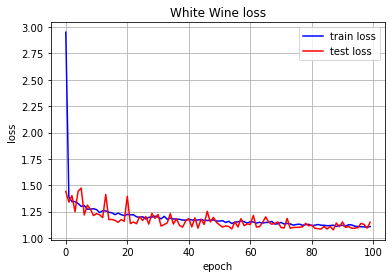

In [494]:
train_loss = hist.history['loss']
test_loss = hist.history['val_loss']
plt.title('White Wine loss')
plt.plot(train_loss, 'b', label='train loss')
plt.plot(test_loss, 'r', label='test loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

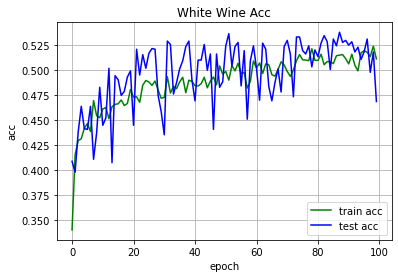

In [495]:
train_acc = hist.history['accuracy']
test_acc = hist.history['val_accuracy']

plt.title('White Wine Acc')
plt.plot(train_acc, 'g', label='train acc')
plt.plot(test_acc, 'b', label='test acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')

plt.show()

In [496]:
test_loss, test_acc = whitemodel.evaluate(x_test, y_test,verbose = 2)
print(test_acc)

0.46870747208595276


In [0]:
#red wine
x_train, y_train, x_test, y_test = generate_data(red_wine, 0.7)

In [0]:
redmodel = Sequential()
redmodel.add(Dense(32, input_dim = 11, activation='relu'))
redmodel.add(Dense(units=11, activation='softmax'))

redmodel.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [499]:
hist = redmodel.fit(x_train, y_train, validation_data=[x_test, y_test], epochs=100, batch_size=10)

Train on 1119 samples, validate on 480 samples
Epoch 1/100
1119/1119 [==============================] - 0s 191us/step - loss: 5.8879 - accuracy: 0.3575 - val_loss: 1.4607 - val_accuracy: 0.4938
Epoch 2/100
1119/1119 [==============================] - 0s 134us/step - loss: 1.2446 - accuracy: 0.5058 - val_loss: 1.2225 - val_accuracy: 0.4833
Epoch 3/100
1119/1119 [==============================] - 0s 144us/step - loss: 1.1890 - accuracy: 0.4951 - val_loss: 1.2556 - val_accuracy: 0.5208
Epoch 4/100
1119/1119 [==============================] - 0s 135us/step - loss: 1.1622 - accuracy: 0.5201 - val_loss: 1.2303 - val_accuracy: 0.4667
Epoch 5/100
1119/1119 [==============================] - 0s 133us/step - loss: 1.1674 - accuracy: 0.4969 - val_loss: 1.2206 - val_accuracy: 0.4500
Epoch 6/100
1119/1119 [==============================] - 0s 138us/step - loss: 1.1552 - accuracy: 0.4906 - val_loss: 1.1789 - val_accuracy: 0.4729
Epoch 7/100
1119/1119 [==============================] - 0s 136us/step 

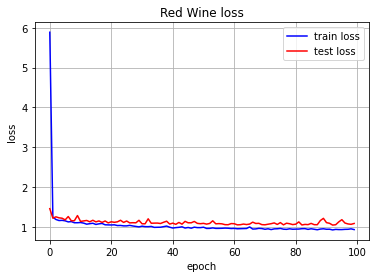

In [500]:
train_loss = hist.history['loss']
test_loss = hist.history['val_loss']
plt.title('Red Wine loss')
plt.plot(train_loss, 'b', label='train loss')
plt.plot(test_loss, 'r', label='test loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

In [501]:
test_loss, test_acc = redmodel.evaluate(x_test, y_test, verbose=2)
print(test_acc)

0.5479166507720947


### 2. 각 모델의 성능을 향상시킬 수 있는 방법 적용
* 하이퍼파라미터를 변경하여 테스트 셋에서의 정확도를 향상시킬 것
    * 예) 레이어 수, 노드 수, Learning rate 등
* 하이퍼파라미터를 변화시킨 각각의 모델에 대해, 트레이닝 Epoch 당 Loss의 변화를 기록하고 이를 시각화
* 그 외 성능을 향상시킬 수 있는 모든 방법을 사용하여 가장 성능이 좋은 모델을 선택
    * 예) Dropout, Normalization 등

Train on 3428 samples, validate on 1470 samples
Epoch 1/100
3428/3428 [==============================] - 1s 152us/step - loss: 3.3951 - accuracy: 0.3757 - val_loss: 1.4349 - val_accuracy: 0.4014
Epoch 2/100
3428/3428 [==============================] - 0s 132us/step - loss: 1.4088 - accuracy: 0.4099 - val_loss: 1.4221 - val_accuracy: 0.4259
Epoch 3/100
3428/3428 [==============================] - 0s 131us/step - loss: 1.3377 - accuracy: 0.4414 - val_loss: 1.2866 - val_accuracy: 0.4592
Epoch 4/100
3428/3428 [==============================] - 0s 136us/step - loss: 1.3308 - accuracy: 0.4481 - val_loss: 1.3007 - val_accuracy: 0.3946
Epoch 5/100
3428/3428 [==============================] - 0s 133us/step - loss: 1.3019 - accuracy: 0.4481 - val_loss: 1.2957 - val_accuracy: 0.4422
Epoch 6/100
3428/3428 [==============================] - 0s 132us/step - loss: 1.2797 - accuracy: 0.4580 - val_loss: 1.2539 - val_accuracy: 0.4612
Epoch 7/100
3428/3428 [==============================] - 0s 135us/step

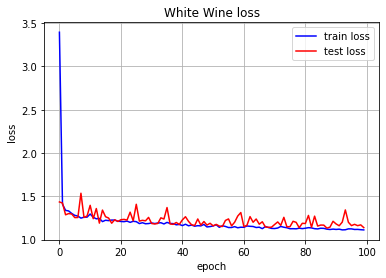

Before Improvement : test_Accuracy = 0.5258503556251526



In [573]:
##########################################################
from keras import optimizers

# white wine
x_train, y_train, x_test, y_test = generate_data(white_wine, 0.7)
##########################################################
#Before improvement
%matplotlib inline
import matplotlib.pyplot as plt

# white wine
whitemodel = Sequential()
whitemodel.add(Dense(32, input_dim = 11, activation='relu'))
whitemodel.add(Dense(units=11, activation='softmax'))

whitemodel.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist = whitemodel.fit(x_train, y_train,validation_data = [x_test, y_test], epochs=100, batch_size=10)

train_loss = hist.history['loss']
test_loss = hist.history['val_loss']
plt.title('White Wine loss')
plt.plot(train_loss, 'b', label='train loss')
plt.plot(test_loss, 'r', label='test loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()


result = whitemodel.evaluate(x_test, y_test, verbose=2)
print("Before Improvement : test_Accuracy = "+str(result[1]))
print("")
###########################################################

Train on 3428 samples, validate on 1470 samples
Epoch 1/100
 - 0s - loss: 2.5601 - accuracy: 0.0470 - val_loss: 3.9579 - val_accuracy: 0.2986
Epoch 2/100
 - 0s - loss: 2.2584 - accuracy: 0.2319 - val_loss: 3.3889 - val_accuracy: 0.2946
Epoch 3/100
 - 0s - loss: 2.0463 - accuracy: 0.3425 - val_loss: 2.9756 - val_accuracy: 0.2946
Epoch 4/100
 - 0s - loss: 1.8878 - accuracy: 0.4064 - val_loss: 2.4778 - val_accuracy: 0.2946
Epoch 5/100
 - 0s - loss: 1.7574 - accuracy: 0.4492 - val_loss: 2.0944 - val_accuracy: 0.2946
Epoch 6/100
 - 0s - loss: 1.6570 - accuracy: 0.4630 - val_loss: 1.8922 - val_accuracy: 0.2939
Epoch 7/100
 - 0s - loss: 1.5749 - accuracy: 0.4740 - val_loss: 1.7972 - val_accuracy: 0.2939
Epoch 8/100
 - 0s - loss: 1.5071 - accuracy: 0.4781 - val_loss: 1.7214 - val_accuracy: 0.2959
Epoch 9/100
 - 0s - loss: 1.4488 - accuracy: 0.4857 - val_loss: 1.6736 - val_accuracy: 0.3116
Epoch 10/100
 - 0s - loss: 1.4017 - accuracy: 0.4950 - val_loss: 1.6328 - val_accuracy: 0.3537
Epoch 11/10

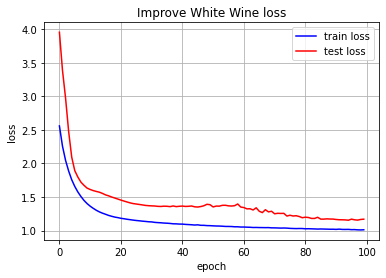

After Improvement : test_accuracy = 0.5122448801994324



In [578]:
#white wine improvement
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import  Dropout
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization

model = Sequential()
# Hidden layer 하나 추가, node : 32 -> 64
# Batch Normalization

model.add(Dense(64, input_dim = 11))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64))
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dense(units=11, activation='softmax'))

# optimizer 변경, learning_rate 변경
opt = optimizers.Adamax(learning_rate=0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

# earlyStopping, modelCheckpoint 설정
# batch_size 변경
es = EarlyStopping(monitor= 'val_loss', patience = 40, verbose = 1, mode = 'min')
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100, batch_size=128, verbose=2, callbacks = [es, mc])

train_loss = hist.history['loss']
test_loss = hist.history['val_loss']
plt.title('Improve White Wine loss')
plt.plot(train_loss, 'b', label='train loss')
plt.plot(test_loss, 'r', label='test loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()


result = model.evaluate(x_test, y_test, verbose=2)
print("After Improvement : test_accuracy = "+str(result[1]))
print("")
###########################################################

Train on 1119 samples, validate on 480 samples
Epoch 1/100
1119/1119 [==============================] - 0s 212us/step - loss: 1.9296 - accuracy: 0.3700 - val_loss: 1.3268 - val_accuracy: 0.4646
Epoch 2/100
1119/1119 [==============================] - 0s 134us/step - loss: 1.2135 - accuracy: 0.4817 - val_loss: 1.2515 - val_accuracy: 0.4708
Epoch 3/100
1119/1119 [==============================] - 0s 134us/step - loss: 1.1669 - accuracy: 0.5112 - val_loss: 1.2093 - val_accuracy: 0.4812
Epoch 4/100
1119/1119 [==============================] - 0s 136us/step - loss: 1.1666 - accuracy: 0.5255 - val_loss: 1.2941 - val_accuracy: 0.4833
Epoch 5/100
1119/1119 [==============================] - 0s 141us/step - loss: 1.1297 - accuracy: 0.5165 - val_loss: 1.1983 - val_accuracy: 0.4979
Epoch 6/100
1119/1119 [==============================] - 0s 141us/step - loss: 1.1250 - accuracy: 0.5264 - val_loss: 1.1993 - val_accuracy: 0.5167
Epoch 7/100
1119/1119 [==============================] - 0s 135us/step 

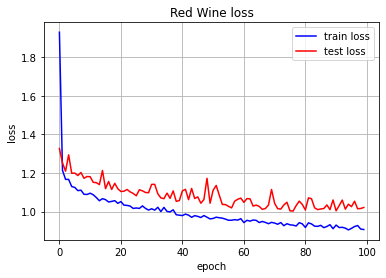

Before Improvement : test_Accuracy = 0.3187499940395355



In [559]:

# red wine
x_train, y_train, x_test, y_test = generate_data(red_wine, 0.7)
##########################################################
#Before improvement
# red wine
redmodel = Sequential()
redmodel.add(Dense(32, input_dim = 11, activation='relu'))
redmodel.add(Dense(units=11, activation='softmax'))

redmodel.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

hist = redmodel.fit(x_train, y_train,validation_data = [x_test, y_test], epochs=100, batch_size=10)

train_loss = hist.history['loss']
test_loss = hist.history['val_loss']
plt.title('Red Wine loss')
plt.plot(train_loss, 'b', label='train loss')
plt.plot(test_loss, 'r', label='test loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()


result = whitemodel.evaluate(x_test, y_test, verbose=2)
print("Before Improvement : test_Accuracy = "+str(result[1]))
print("")
###########################################################

Train on 1119 samples, validate on 480 samples
Epoch 1/100
 - 0s - loss: 2.4133 - accuracy: 0.2198 - val_loss: 2.5860 - val_accuracy: 0.3958
Epoch 2/100
 - 0s - loss: 2.0349 - accuracy: 0.3414 - val_loss: 1.7553 - val_accuracy: 0.4521
Epoch 3/100
 - 0s - loss: 1.8065 - accuracy: 0.4727 - val_loss: 1.7766 - val_accuracy: 0.4479
Epoch 4/100
 - 0s - loss: 1.6581 - accuracy: 0.4879 - val_loss: 1.7969 - val_accuracy: 0.4604
Epoch 5/100
 - 0s - loss: 1.5326 - accuracy: 0.4897 - val_loss: 1.7863 - val_accuracy: 0.4625
Epoch 6/100
 - 0s - loss: 1.4375 - accuracy: 0.5004 - val_loss: 1.7612 - val_accuracy: 0.4583
Epoch 7/100
 - 0s - loss: 1.3676 - accuracy: 0.5156 - val_loss: 1.7374 - val_accuracy: 0.4583
Epoch 8/100
 - 0s - loss: 1.3053 - accuracy: 0.5308 - val_loss: 1.7135 - val_accuracy: 0.4521
Epoch 9/100
 - 0s - loss: 1.2538 - accuracy: 0.5335 - val_loss: 1.6870 - val_accuracy: 0.4521
Epoch 10/100
 - 0s - loss: 1.2198 - accuracy: 0.5424 - val_loss: 1.6584 - val_accuracy: 0.4521
Epoch 11/100

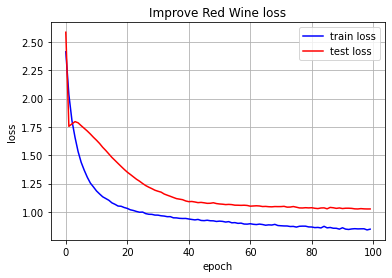

After Improvement : test_accuracy = 0.581250011920929



In [571]:
#red wine improvement
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import  Dropout
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Dense(64, input_dim = 11))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64))
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dense(units=11, activation='softmax'))

opt = optimizers.Adamax(learning_rate=0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

es = EarlyStopping(monitor= 'val_loss', patience = 40, verbose = 1, mode = 'min')
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100, batch_size=128, verbose=2, callbacks = [es, mc])

train_loss = hist.history['loss']
test_loss = hist.history['val_loss']
plt.title('Improve Red Wine loss')
plt.plot(train_loss, 'b', label='train loss')
plt.plot(test_loss, 'r', label='test loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()


result = model.evaluate(x_test, y_test, verbose=2)
print("After Improvement : test_accuracy = "+str(result[1]))
print("")
###########################################################

### 3. 화이트 와인과 레드 와인을 하나의 모델만 사용하여 분류
* 화이트 와인과 레드 와인 데이터를 합쳐 wine 데이터 셋 생성
* 입력이 화이트 와인인지 레드 와인인지에 관계없이 와인 품질을 분류하는 모델 생성
* 모델의 성능을 향상시킬 수 있는 방법을 찾아 적용할 것


In [0]:
##########################################################
from pandas import DataFrame
ww = pd.DataFrame(white_wine)
rw = pd.DataFrame(red_wine)

wine = pd.concat([rw,ww], ignore_index = True)
display(wine)

###########################################################

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [0]:

x_train, y_train, x_test, y_test = generate_data(wine,0.7)

In [0]:
# wine
model = Sequential()
model.add(Dense(32, input_dim = 11, activation='relu'))
model.add(Dense(units=11, activation='softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [654]:
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100, batch_size=10)

Train on 4547 samples, validate on 1950 samples
Epoch 1/100
4547/4547 [==============================] - 1s 216us/step - loss: 1.0360 - accuracy: 0.5459 - val_loss: 1.0390 - val_accuracy: 0.5477
Epoch 2/100
4547/4547 [==============================] - 1s 218us/step - loss: 1.0303 - accuracy: 0.5494 - val_loss: 1.0522 - val_accuracy: 0.5446
Epoch 3/100
4547/4547 [==============================] - 1s 217us/step - loss: 1.0314 - accuracy: 0.5514 - val_loss: 1.0355 - val_accuracy: 0.5523
Epoch 4/100
4547/4547 [==============================] - 1s 215us/step - loss: 1.0259 - accuracy: 0.5608 - val_loss: 1.0366 - val_accuracy: 0.5503
Epoch 5/100
4547/4547 [==============================] - 1s 214us/step - loss: 1.0278 - accuracy: 0.5496 - val_loss: 1.0408 - val_accuracy: 0.5559
Epoch 6/100
4547/4547 [==============================] - 1s 212us/step - loss: 1.0247 - accuracy: 0.5529 - val_loss: 1.0370 - val_accuracy: 0.5585
Epoch 7/100
4547/4547 [==============================] - 1s 211us/step

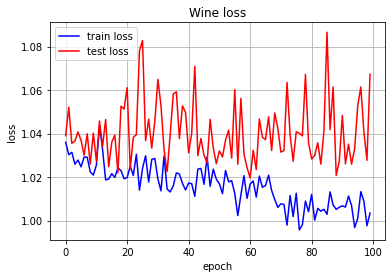

In [655]:
train_loss = hist.history['loss']
test_loss = hist.history['val_loss']
plt.title('Wine loss')
plt.plot(train_loss, 'b', label='train loss')
plt.plot(test_loss, 'r', label='test loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

In [656]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Before Improvement, total wine: test_accuracy = "+str(test_acc))

Before Improvement, total wine: test_accuracy = 0.5487179756164551


Train on 4547 samples, validate on 1950 samples
Epoch 1/100
 - 1s - loss: 2.1614 - accuracy: 0.3231 - val_loss: 2.3805 - val_accuracy: 0.4062
Epoch 2/100
 - 0s - loss: 1.5877 - accuracy: 0.4566 - val_loss: 1.8912 - val_accuracy: 0.4267
Epoch 3/100
 - 0s - loss: 1.3832 - accuracy: 0.4827 - val_loss: 1.6898 - val_accuracy: 0.4241
Epoch 4/100
 - 0s - loss: 1.2798 - accuracy: 0.4979 - val_loss: 1.5717 - val_accuracy: 0.4190
Epoch 5/100
 - 0s - loss: 1.2106 - accuracy: 0.5223 - val_loss: 1.4335 - val_accuracy: 0.4328
Epoch 6/100
 - 0s - loss: 1.1747 - accuracy: 0.5212 - val_loss: 1.3671 - val_accuracy: 0.4313
Epoch 7/100
 - 0s - loss: 1.1488 - accuracy: 0.5186 - val_loss: 1.3065 - val_accuracy: 0.4497
Epoch 8/100
 - 0s - loss: 1.1301 - accuracy: 0.5426 - val_loss: 1.2396 - val_accuracy: 0.4785
Epoch 9/100
 - 0s - loss: 1.1180 - accuracy: 0.5329 - val_loss: 1.2076 - val_accuracy: 0.4790
Epoch 10/100
 - 0s - loss: 1.1062 - accuracy: 0.5386 - val_loss: 1.1807 - val_accuracy: 0.4918
Epoch 11/10

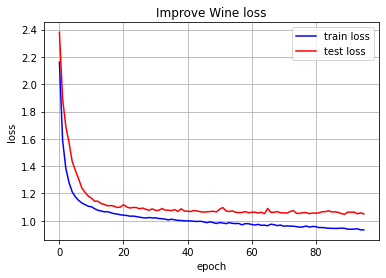

After Improvement : test_accuracy = 0.5579487085342407



In [652]:
#wine improvement
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import  Dropout
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Dense(64, input_dim = 11))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(64))
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dense(64))
model.add(BatchNormalization()) 
model.add(Activation('relu'))
model.add(Dense(units=11, activation='softmax'))

opt = optimizers.Adamax(learning_rate=0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

es = EarlyStopping(monitor= 'val_accuracy', patience = 20, verbose = 1, mode = 'max')
mc = ModelCheckpoint(filepath='bestgraph.hdf5', monitor='val_accuracy', mode='max', save_best_only=True)
hist = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100, batch_size=128, verbose=2, callbacks = [es, mc])

train_loss = hist.history['loss']
test_loss = hist.history['val_loss']
plt.title('Improve Wine loss')
plt.plot(train_loss, 'b', label='train loss')
plt.plot(test_loss, 'r', label='test loss')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()


result = model.evaluate(x_test, y_test, verbose=2)
print("After Improvement : test_accuracy = "+str(result[1]))
print("")
###########################################################